In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/analysis_learning_PERG/

/content/drive/MyDrive/analysis_learning_PERG


# Import Libraries

In [3]:
!pip install fuzzywuzzy

In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from fuzzywuzzy import fuzz


/usr/local/lib/python3.10/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


# Exploratory Data Analysis

Explore interesting data characterisitics of the participants to gain some insights before analysing and learning from the PERG data recorded from the patients

In [5]:
processed_data = "data/processed_data"

In [6]:
def drop_duplicate(series):
  non_duplicates = series.drop_duplicates()

  return non_duplicates

In [ ]:
sex_df = pd.DataFrame()

for dir in os.listdir(processed_data):
  csv_file = os.path.join(processed_data, dir, 'participant_info.csv')

  participant_info = pd.read_csv(csv_file)
  row = drop_duplicate(participant_info.sex)
  sex_df = pd.concat([sex_df, row], axis=0)

In [ ]:
print(f"Sex Categories: {sex_df[0].unique()}")

Sex Categories: ['Male' 'Female']


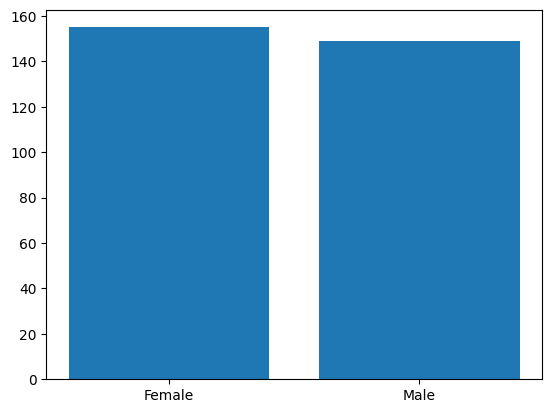

In [ ]:
plt.bar(['Female', 'Male'], [sum(sex_df[0]=='Female'), sum(sex_df[0]=='Male')])
plt.show()

In [7]:
diagnosis_df = pd.DataFrame()

for dir in os.listdir(processed_data):
  csv_file = os.path.join(processed_data, dir, 'participant_info.csv')

  participant_info = pd.read_csv(csv_file)
  row = drop_duplicate(participant_info[['diagnosis1', 'diagnosis2', 'diagnosis3']])
  diagnosis_df = pd.concat([diagnosis_df, row], axis=0)

diagnosis_df = np.hstack((diagnosis_df['diagnosis1'], diagnosis_df['diagnosis2'], diagnosis_df['diagnosis3']))

In [ ]:
print(f"Diagnosis Categories: {Counter(diagnosis_df)}")

Diagnosis Categories: Counter({nan: 524, 'Normal': 100, 'Retinitis pigmentosa': 44, 'Macular dystrophy': 31, 'Stargardt disease': 22, 'Cone-Rod dystrophy': 14, 'Inflammatory disease': 14, 'Inherited optic atrophy': 10, 'Fundus flavimaculatus': 9, 'Congenital stationary night blindness': 8, 'Congenital abnormality of the retina': 7, 'Chorioretinopathy Birdshot type': 6, 'Central areolar choroidal dystrophy': 6, 'Periferina': 6, 'Retinal toxicity': 5, 'X linked retinoschisis': 5, 'Central serous chorioretinopathy (CSCR)': 5, 'Autoimmune retinopathy': 4, 'Pattern macular dystrophy': 4, 'Systemic disorder with ocular manifestations': 4, 'Vitelliform macular dystrophy': 4, 'Congenital achromatopsia': 3, 'Retinitis pigmentosa (sector)': 3, 'Nonarteritic anterior ischemic optic neuropathy': 3, 'Congenital Achromatopsia': 3, 'Optic neuropathy': 3, 'Albinism': 3, 'Usher syndrome': 3, 'Dominant drusen': 3, 'Bilateral optic nerve atrophy': 2, 'Traumatic optic neuropathy': 2, 'Albinoidism\xa0': 2,

Going through the above output there are diagnosis with different names which refer to same diagnosis, therefore these duplicates need to be normalised across

In [8]:
unique_diagnosis = np.unique(diagnosis_df[~pd.isnull(diagnosis_df)])
diagnosis_set = set()
diagnosis_map = {}

for i in range(len(unique_diagnosis)):
  word_i = unique_diagnosis[i]

  for j in range(i+1, len(unique_diagnosis)):
    word_j = unique_diagnosis[j]

    if word_j not in diagnosis_set:
      ratio = fuzz.ratio(word_i, word_j)
      if ratio > 70:
        diagnosis_set.add(word_j)

        if word_i not in diagnosis_map.keys():
          diagnosis_map[word_i] = [word_j]
        else:
          diagnosis_map[word_i].append(word_j)

Double check if the grouping is correct by some background research. Remove the inaccurate ones and keep the accurate ones.

In [ ]:
diagnosis_map

{'14q32 deletion: Systemic disorder with ocular manifestations': ['Alport syndrome: Systemic disorder with ocular manifestations',
  'Systemic disorder with ocular manifestations'],
 'Age related choroidal atrophy': ['Central areolar choroidal dystrophy'],
 'Albinism': ['Albinoidism\xa0'],
 'Bilateral Optic Atrophy': ['Bilateral optic nerve atrophy'],
 'Central nervous system disorder': ['Central nervous system infection',
  'Central nervous system toxicity'],
 'Congenital Achromatopsia': ['Congenital achromatopsia'],
 'Ischemic optic neuropathy': ['Optic neuropathy',
  'Traumatic optic neuropathy'],
 'Macula toxicity': ['Retinal toxicity'],
 'Macular dystrophy': ['Pattern macular dystrophy', 'Reticular dystrophy'],
 'Optic neuropathy': ['Toxic neuropathy'],
 'Pattern macular dystrophy': ['Pseudovitelliform macular dystrophy',
  'Vitelliform macular dystrophy'],
 'Pseudo retinitis pigmentosa': ['Retinitis pigmentosa'],
 'Retinitis pigmentosa': ['Retinitis pigmentosa (sector)']}

'14q32 deletion: Systemic disorder with ocular manifestations', 'Alport syndrome: Systemic disorder with ocular manifestations', and 'Systemic disorder with ocular manifestations' are all different so we have to remove it.

'Age related choroidal atrophy' and 'Central areolar choroidal dystrophy' are not the same so we have to remove it.

'Albinism' and 'Albinoidism\xa0' are not the same so we have to remove it.

'Central nervous system disorder', 'Central nervous system infection' and 'Central nervous system toxicity' are all different so we have to remove it.

'Ischemic optic neuropathy', 'Optic neuropathy' and 'Traumatic optic neuropathy' are all different so we have to remove it.

'Macula toxicity' and 'Retinal toxicity' are different so we have to remove it.

'Optic neuropathy' and 'Toxic neuropathy' are different so we have to remove it.

'Pattern macular dystrophy', 'Pseudovitelliform macular dystrophy' and 'Vitelliform macular dystrophy' are different so we have to remove it.

'Pseudo retinitis pigmentosa' and 'Retinitis pigmentosa' are different so we have to remove it.

'Retinitis pigmentosa', 'Retinitis pigmentosa (sector)' are different so we have to remove it.

'Macular dystrophy', 'Pattern macular dystrophy' and 'Reticular dystrophy' similar but are distinct therefore we have to remove it.

In [ ]:
[diagnosis_map.pop(key) for key in ['14q32 deletion: Systemic disorder with ocular manifestations', 'Age related choroidal atrophy',\
                                    'Albinism', 'Central nervous system disorder', 'Ischemic optic neuropathy', 'Macula toxicity',\
                                    'Optic neuropathy', 'Pattern macular dystrophy', 'Pseudo retinitis pigmentosa', 'Retinitis pigmentosa', 'Macular dystrophy']]

[['Alport syndrome: Systemic disorder with ocular manifestations',
  'Systemic disorder with ocular manifestations'],
 ['Central areolar choroidal dystrophy'],
 ['Albinoidism\xa0'],
 ['Central nervous system infection', 'Central nervous system toxicity'],
 ['Optic neuropathy', 'Traumatic optic neuropathy'],
 ['Retinal toxicity'],
 ['Toxic neuropathy'],
 ['Pseudovitelliform macular dystrophy', 'Vitelliform macular dystrophy'],
 ['Retinitis pigmentosa'],
 ['Retinitis pigmentosa (sector)']]

In [ ]:
diagnosis_map

{'Bilateral Optic Atrophy': ['Bilateral optic nerve atrophy'],
 'Congenital Achromatopsia': ['Congenital achromatopsia'],
 'Macular dystrophy': ['Pattern macular dystrophy', 'Reticular dystrophy']}

The dataset can be cleaned, but before that it is important to see how many participants are diagnosed with medical conditions of interest.

Medical conditions of interest:
1.   Macular Diseases
2.   Optical Nerve Diseases

The control group can be participants with no medical diagnosis (Normal).



In [9]:
macular_diseases = ["Macular dystrophy", "Stargardt disease", "Fundus flavimaculatus", "Chorioretinopathy Birdshot type", "Central areolar choroidal dystrophy",\
                    "Periferina", "Central serous chorioretinopathy (CSCR)", "Pattern macular dystrophy", "Vitelliform macular dystrophy", "Dominant drusen", "Albinoidism",\
                    "Torpedo maculopathy", "Foveal hypoplasia", "Blue cone monochromatism", "Pseudovitelliform macular dystrophy", "Macular telangiectasias", "Pseudopapiledema",\
                    "Pseudo retinitis pigmentosa", "Acute macular neuroretinopathy", "Reticular dystrophy", "Macular hole", "Benign concentric annular macular dystrophy",\
                    "Retinal vein occlusion", "Bietti's Crystalline Corneoretinal Dystrophy", "Speckled retinal pigment epithelium"]

optic_diseases = ["Retinitis pigmentosa", "Inherited optic atrophy", "Retinitis pigmentosa (sector)", "Nonarteritic anterior ischemic optic neuropathy", "Optic neuropathy",\
                  "Bilateral optic nerve atrophy", "Traumatic optic neuropathy", "Albinoidism", "Ischemic optic neuropathy", "Pseudopapiledema", "Infectious neuritis",\
                  "Bilateral Optic Atrophy", "External ophthalmoplegia", "Pseudo retinitis pigmentosa", "Affectation of the chiasm", "Glaucoma", "Retinal astrocytic hamartoma",\
                  "Sectorial-Rodopsina", "Retinal vein occlusion"]

control_group = ["Normal"]

In [34]:
macular_optic_df = pd.DataFrame(columns=['id_record', 'diagnosis'])

for dir in os.listdir(processed_data):
  csv_file = os.path.join(processed_data, dir, 'participant_info.csv')

  participant_info = pd.read_csv(csv_file)
  diagnosis = drop_duplicate(participant_info[['diagnosis1', 'diagnosis2', 'diagnosis3']])
  if diagnosis.isin(macular_diseases).any().any():
    disease = "macular"
  elif diagnosis.isin(optic_diseases).any().any():
    disease = "optic"
  elif diagnosis.isin(control_group).any().any():
    disease = "normal"
  else:
    continue

  row = {"id_record": dir, "diagnosis": disease}
  macular_optic_df = macular_optic_df.append(row, ignore_index=True)

<ipython-input-34-6a9c522ac701>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  macular_optic_df = macular_optic_df.append(row, ignore_index=True)
<ipython-input-34-6a9c522ac701>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  macular_optic_df = macular_optic_df.append(row, ignore_index=True)
<ipython-input-34-6a9c522ac701>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  macular_optic_df = macular_optic_df.append(row, ignore_index=True)
<ipython-input-34-6a9c522ac701>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  macular_optic_df = macular_optic_df.append(row, ignore_index=True)
<ipython-input-34-6a9c522ac701>:18: FutureWarnin

In [36]:
macular_optic_df

,id_record,diagnosis
0,0001,normal
1,0004,optic
2,0005,normal
3,0007,normal
4,0008,macular
...,...,...
235,0328,normal
236,0330,normal
237,0331,macular
238,0334,normal


In [38]:
!mkdir data/macular_optic
macular_optic_file_path = "data/macular_optic/data.csv"
macular_optic_df.to_csv(macular_optic_file_path, index=False)

mkdir: cannot create directory ‘data/macular_optic’: File exists


Data regarding patient and their medical condition is saved to the above file path. This can be used for further time series analysis